# Titanic:

In [187]:
import pandas as pd

In [97]:
train=pd.read_csv('/home/govardhan/train.csv')

In [98]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
a=train
a.shape

(891, 12)

In [100]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
a.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
train1=train.drop(['PassengerId','Name','Ticket'],axis=1)

In [103]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [104]:
train1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [105]:
train1=train1.drop(['Cabin'],axis=1)


In [106]:
train1.Age.fillna(value=0,inplace=True)


In [107]:
train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [108]:
import seaborn as sns

In [109]:
cat_train=train1.drop(["Age","Fare"],axis=1)
cat_train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

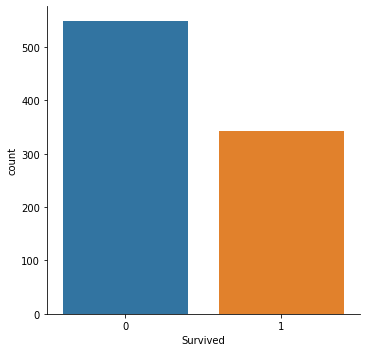

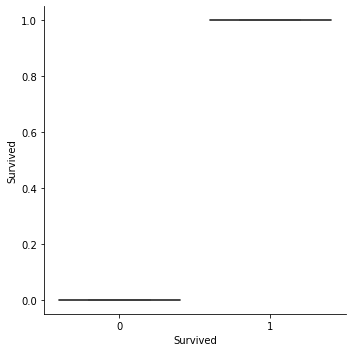

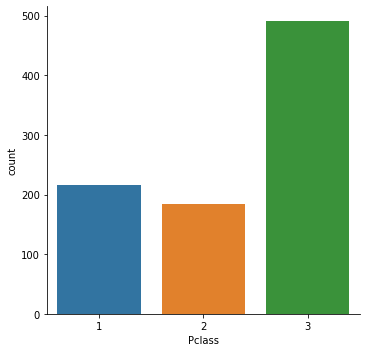

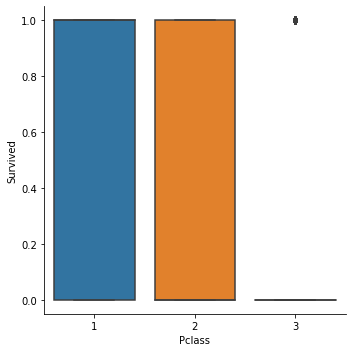

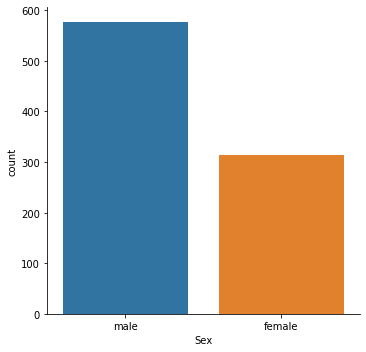

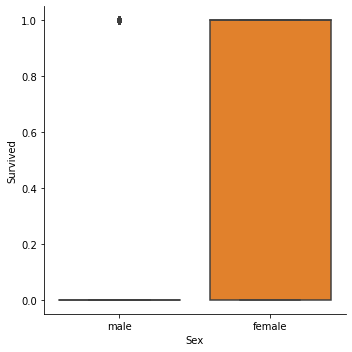

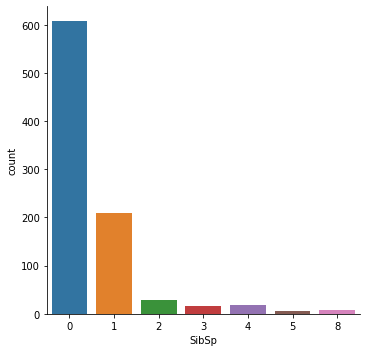

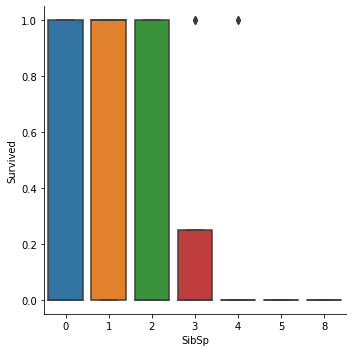

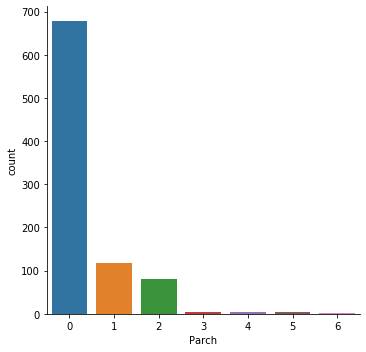

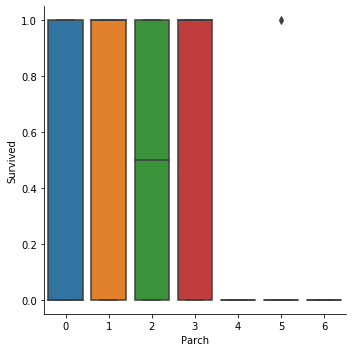

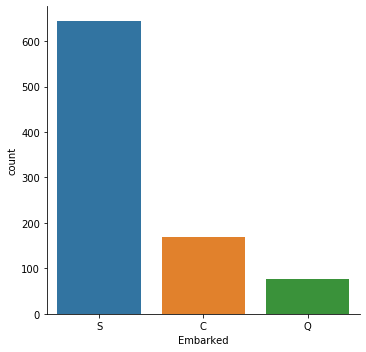

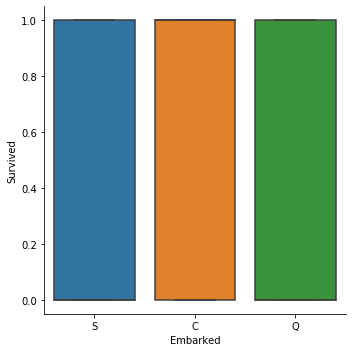

In [110]:
for i in cat_train:
    sns.catplot(x=i,data=cat_train,kind='count')
    sns.catplot(x=i,y='Survived',kind='box',data=cat_train)

In [111]:
continuous_var=train1.drop([ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'],axis=1)

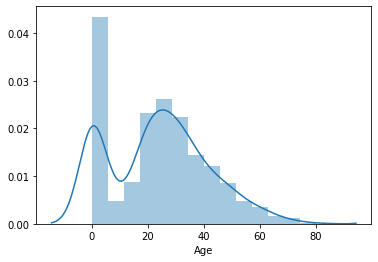

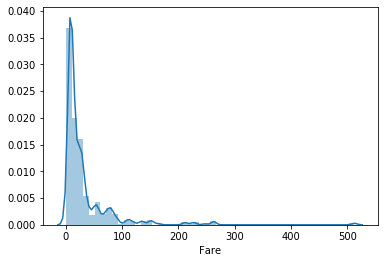

In [112]:
import matplotlib.pyplot as plt
for i in continuous_var:
    if i != 'Survived':
        
        sns.distplot(continuous_var[i])
        plt.show()

In [113]:
cat_train=train1.drop(["Pclass","Age","SibSp","Parch","Fare"],axis=1)

In [114]:
cat_train=pd.get_dummies(cat_train)

In [115]:
train1=train1.drop(['Sex','Embarked'],axis=1)


In [116]:
train1=pd.concat([train1,cat_train],axis=1)

In [117]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [118]:
#corelation:
a_cor=train1.corr()
a_cor

,Survived,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307,1.000000,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500,-0.338481,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516,0.010539,-0.024978,0.024978,0.001246,-0.237586,0.140578
SibSp,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651,-0.035322,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225,0.081629,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000,0.257307,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307,1.000000,0.543351,-0.543351,0.168240,0.003650,-0.155660
Sex_female,0.543351,-0.131900,-0.024978,0.114631,0.245489,0.182333,0.543351,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.024978,-0.114631,-0.245489,-0.182333,-0.543351,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.001246,-0.059528,-0.011069,0.269335,0.168240,0.082853,-0.082853,1.000000,-0.148258,-0.778359


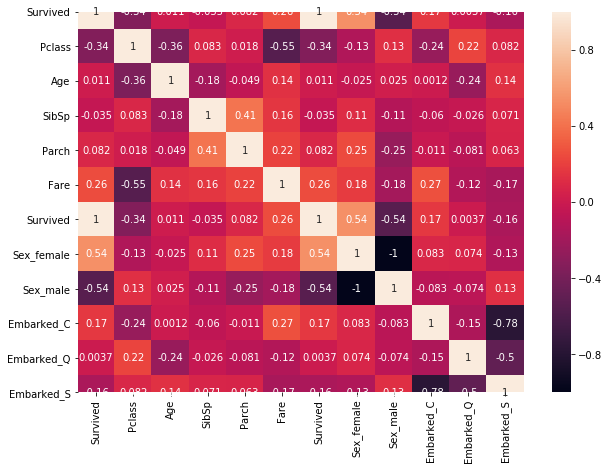

In [188]:
plt.figure(figsize=(10,7))
sns.heatmap(a_cor,annot=True)

In [142]:
#train:
import numpy as np
x=train1.drop(['Survived'],axis=1)
y=train1['Survived']
y=y.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split,cross_val_score

In [166]:
from sklearn.preprocessing import StandardScaler
x_s=StandardScaler()
x1=x_s.fit_transform(x)

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2)

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

dt=cross_val_score(DecisionTreeClassifier(),x_train,y_train)


In [179]:

print('decision tree:',dt,dt.mean(),dt.std())

decision tree: [0.79411765 0.72268908 0.74152542] 0.7527773821392963 0.03022653503281576


In [180]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [181]:
model=dt.fit(x_train,y_train)
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [182]:
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix

In [183]:
#print("train r2score:",r2_score(y_pred=pred_train,y_true=y_train))
#print("test r2score:",r2_score(y_pred=pred_test,y_true=y_test))

print("test acc:",accuracy_score(y_pred=pred_test,y_true=y_test))

print("test error:",mean_squared_error(y_pred=pred_test,y_true=y_test))


test acc: 0.8100558659217877
test error: 0.18994413407821228


In [184]:
print("test:")
print(classification_report(y_pred=pred_test,y_true=y_test))

test:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       115
           1       0.70      0.83      0.76        64

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



In [185]:
confusion_matrix(y_pred=pred_test,y_true=y_test)

array([[92, 23],
       [11, 53]])

In [186]:
pred_test

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0])